## Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np

## Load the Dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Dataset/Kaggle/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2800

In [8]:
paths[:5]

['Dataset/Kaggle/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'Dataset/Kaggle/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'Dataset/Kaggle/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'Dataset/Kaggle/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'Dataset/Kaggle/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [10]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [11]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,Dataset/Kaggle/TESS Toronto emotional speech s...,angry
1,Dataset/Kaggle/TESS Toronto emotional speech s...,angry
2,Dataset/Kaggle/TESS Toronto emotional speech s...,angry
3,Dataset/Kaggle/TESS Toronto emotional speech s...,angry
4,Dataset/Kaggle/TESS Toronto emotional speech s...,angry


In [12]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

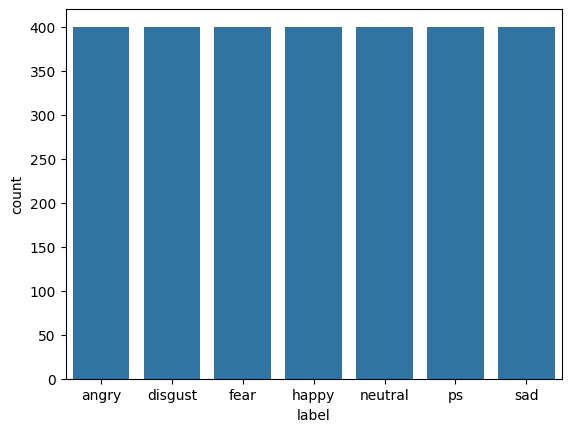

In [13]:
sns.countplot(data=df, x='label')

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

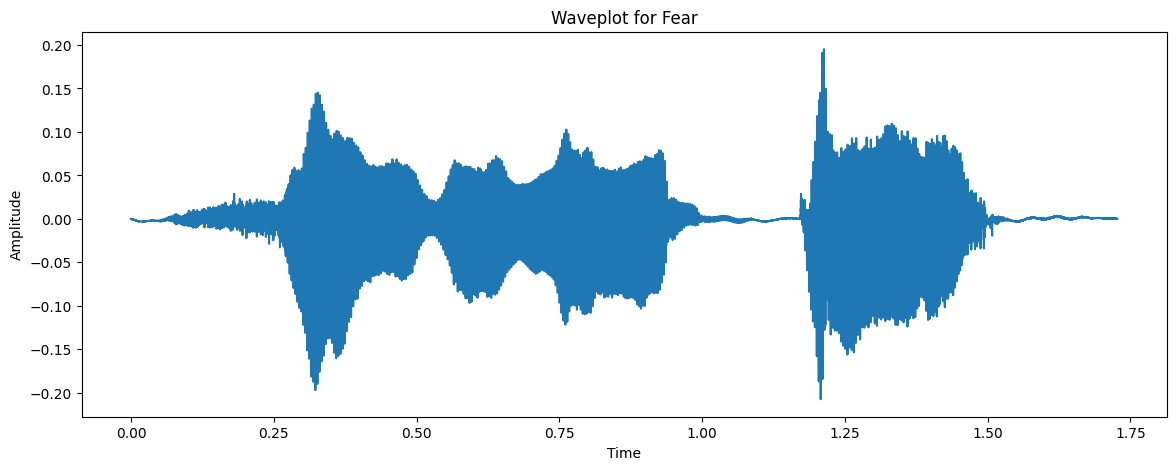

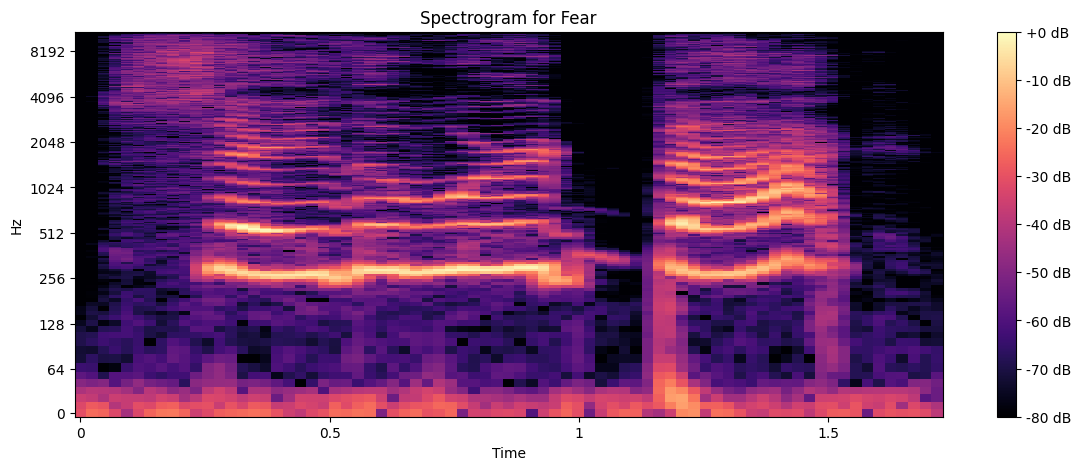

In [15]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Fear')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Fear')
plt.show()
Audio(path)

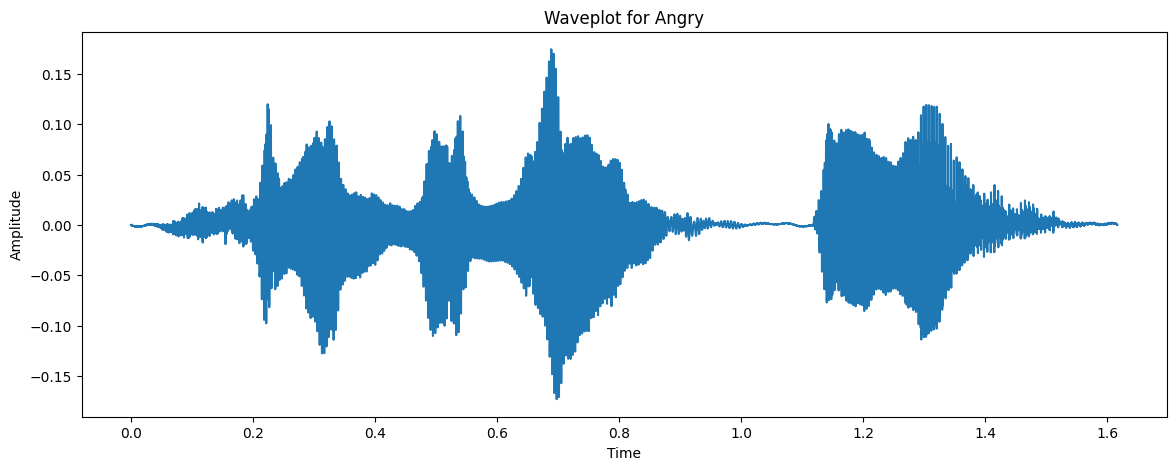

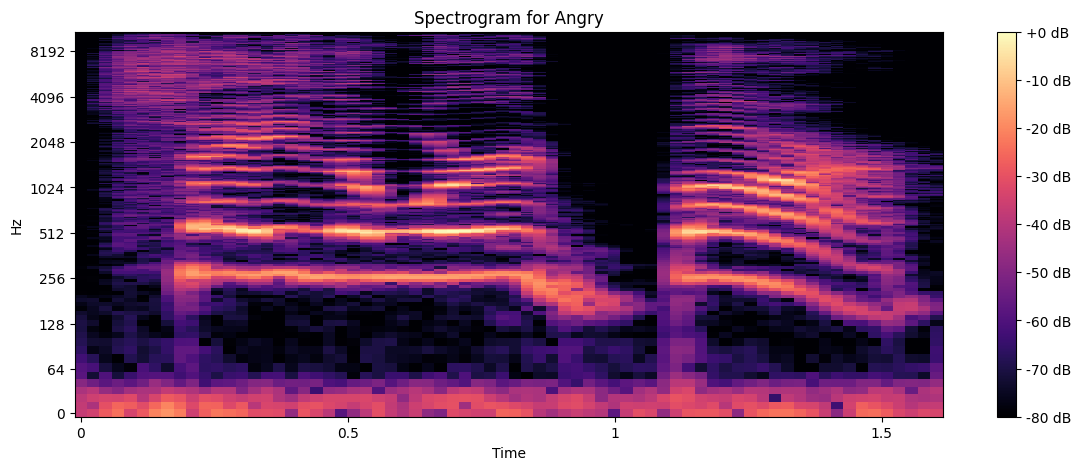

In [16]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Angry')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Angry')
plt.show()
Audio(path)

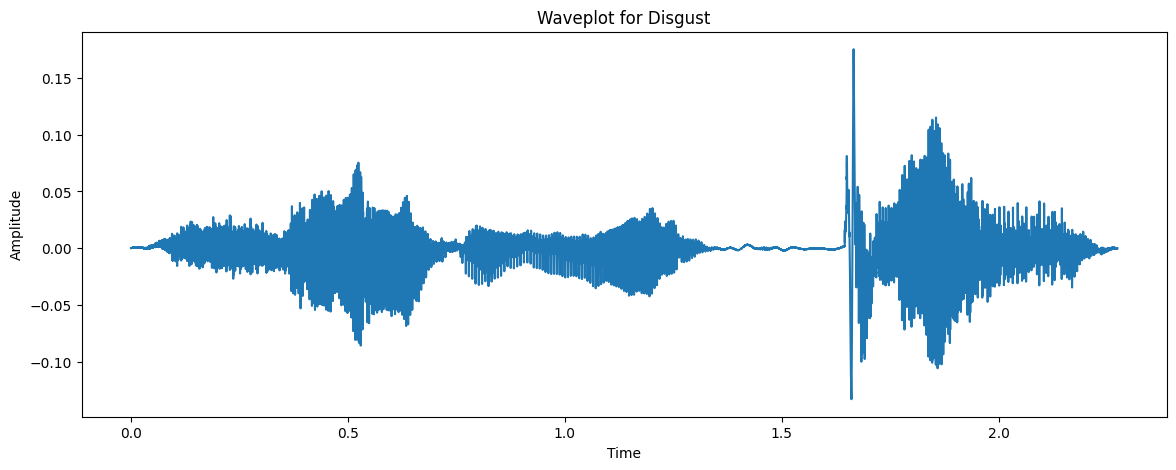

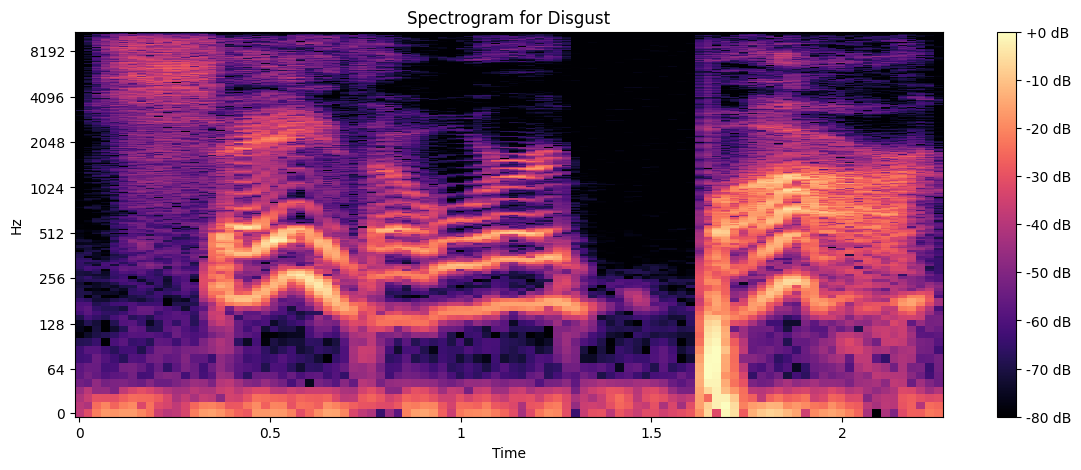

In [17]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Disgust')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Disgust')
plt.show()
Audio(path)

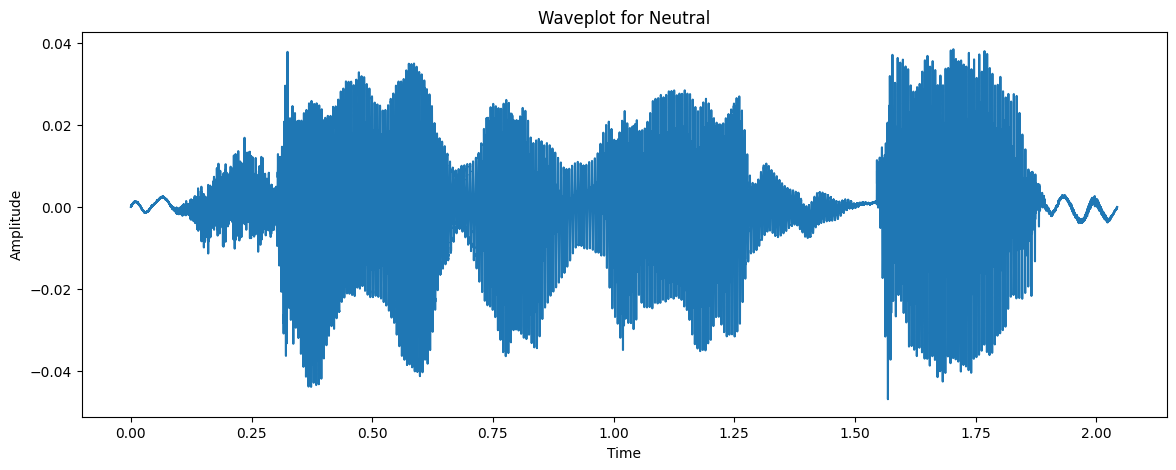

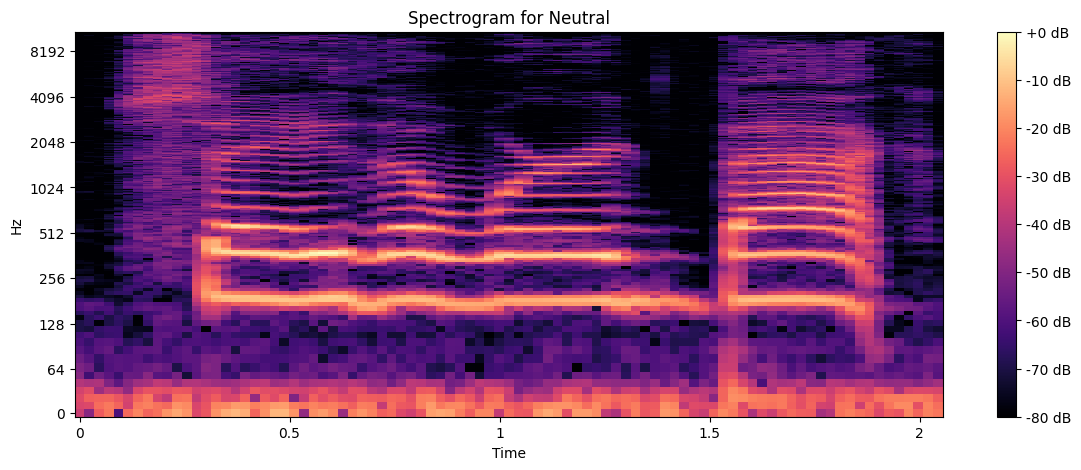

In [18]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Neutral')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Neutral')
plt.show()
Audio(path)

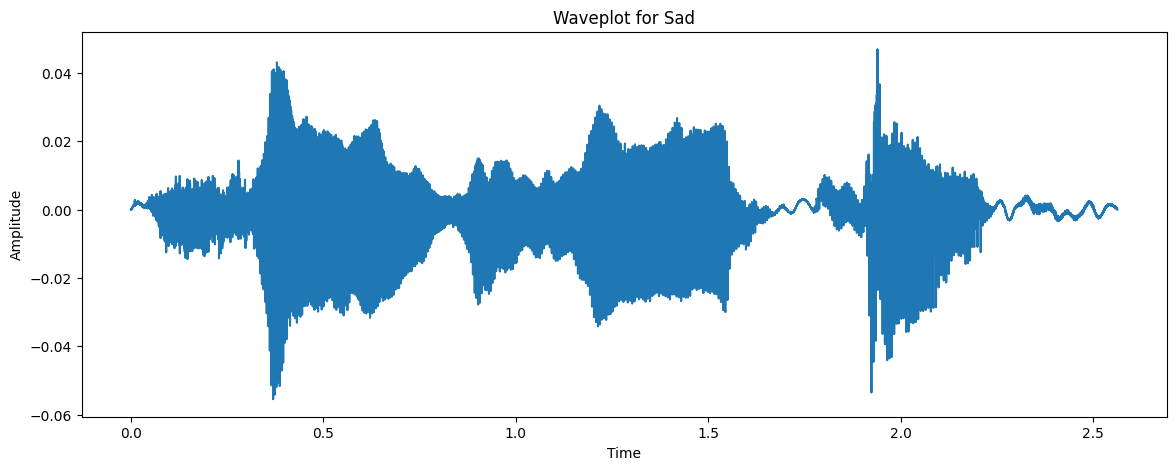

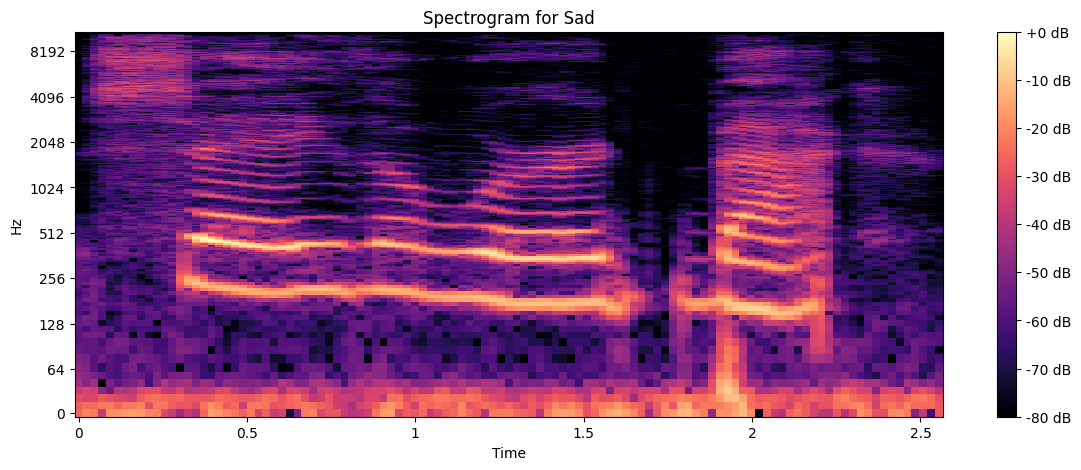

In [19]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Sad')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Sad')
plt.show()
Audio(path)

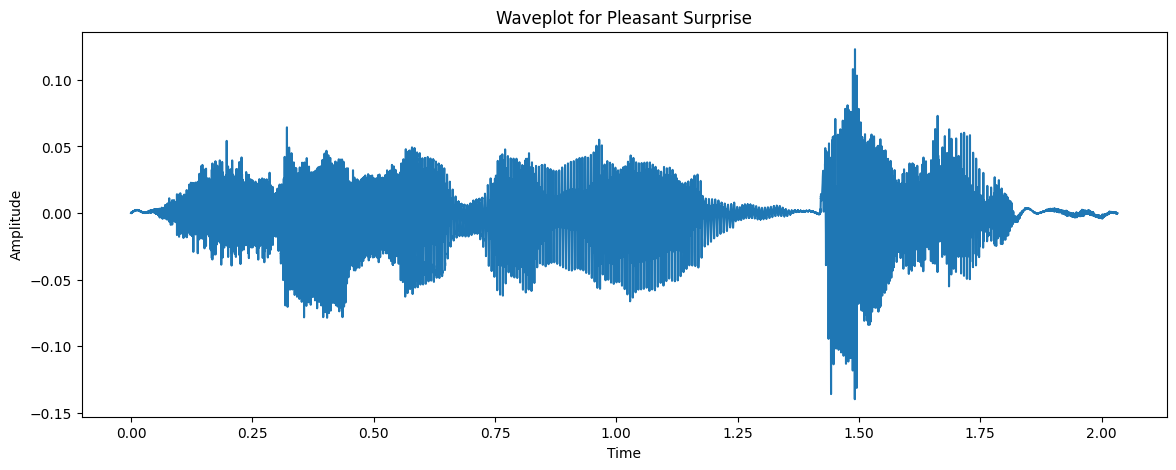

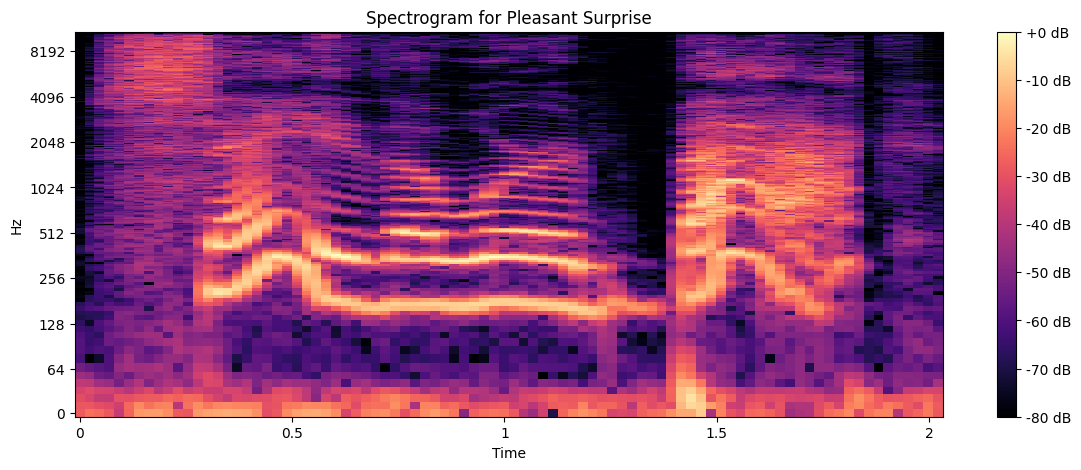

In [20]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Pleasant Surprise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Pleasant Surprise')
plt.show()
Audio(path)

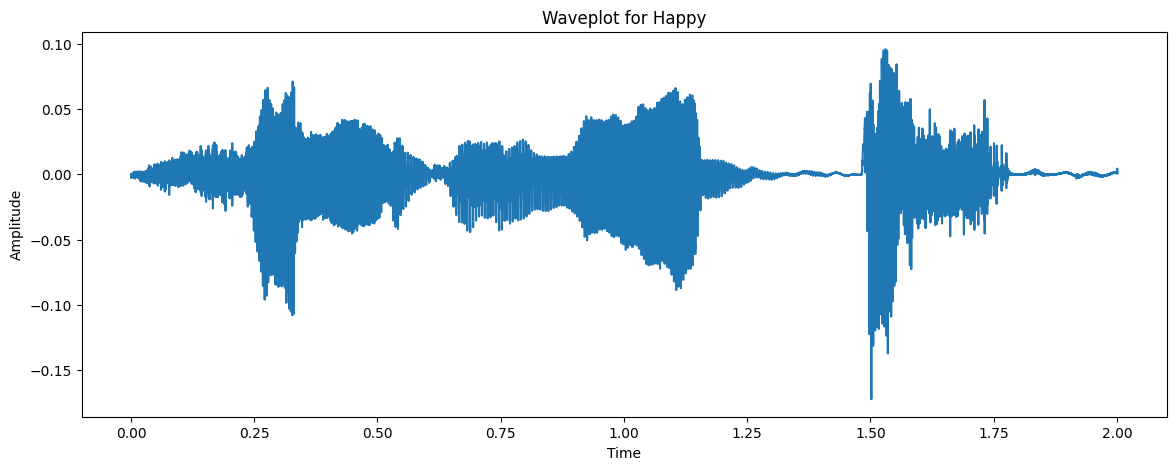

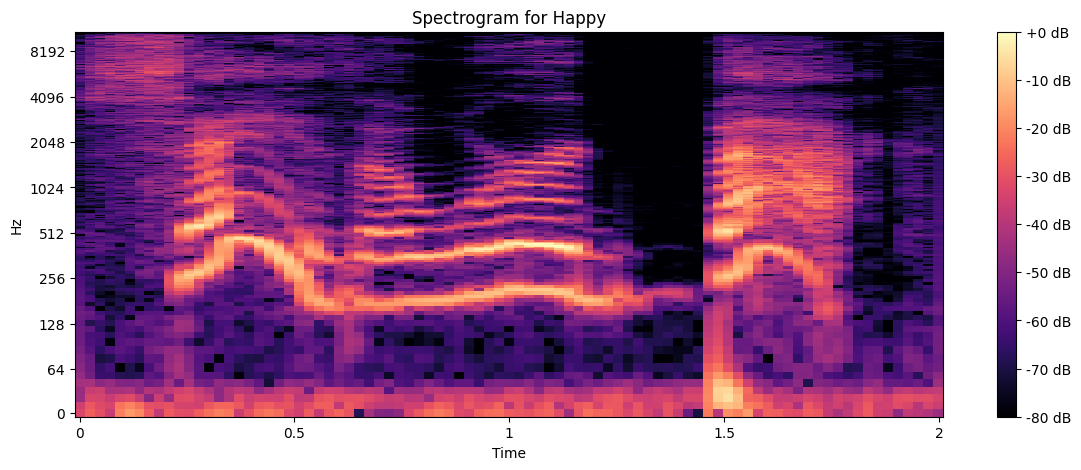

In [21]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and get the sampling rate
data, sampling_rate = librosa.load(path)

# Waveplot
plt.figure(figsize=(14, 5))
plt.title('Waveplot for Happy')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(data)) / sampling_rate, data)
plt.show()

# Spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Happy')
plt.show()
Audio(path)

## Feature Extraction

In [22]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [23]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275649e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228456e+00, -5.57366192e-01, -1.83255339e+00,  2.02101544e-01,
        7.27550566e-01,  1.31773782e+00,  2.88633752e+00,  2.85579085e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115932e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688060e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722015e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996351e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08914971e+00, -1.90649140e+00],
      dtype=float32)

In [24]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [25]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600866, -32.74544, ...
2       [-429.79196, 46.124, 1.5550473, -0.21709459, 2...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.91024, 12.572517, 22...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [26]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [27]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [29]:
y = y.toarray()

In [30]:
y.shape

(2800, 7)

## Create the LSTM Model

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [32]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 33s 789ms/step - loss: 1.0195 - accuracy: 0.6304 - val_loss: 0.9025 - val_accuracy: 0.5411
Epoch 2/50
35/35 [==============================] - 33s 951ms/step - loss: 0.4658 - accuracy: 0.8384 - val_loss: 0.5913 - val_accuracy: 0.7857
Epoch 3/50
35/35 [==============================] - 34s 989ms/step - loss: 0.1802 - accuracy: 0.9433 - val_loss: 0.2061 - val_accuracy: 0.9250
Epoch 4/50
35/35 [==============================] - 34s 975ms/step - loss: 0.1287 - accuracy: 0.9603 - val_loss: 0.2479 - val_accuracy: 0.9089
Epoch 5/50
35/35 [==============================] - 34s 974ms/step - loss: 0.0933 - accuracy: 0.9723 - val_loss: 0.0773 - val_accuracy: 0.9714
Epoch 6/50
35/35 [==============================] - 35s 991ms/step - loss: 0.0881 - accuracy: 0.9705 - val_loss: 0.0933 - val_accuracy: 0.9661
Epoch 7/50
35/35 [==============================] - 33s 941ms/step - loss: 0.1222 - accuracy: 0.9612 - val_loss: 0.1144 - val_accuracy: 0.9696

In [33]:

# Simpan model yang telah dilatih
model.save('Dataset/model.h5')

# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada label
encoded_labels = label_encoder.fit_transform(df['label'])

# Simpan label encoder ke file
np.save('Dataset/label_encoder.npy', label_encoder.classes_)

# Simpan your_target_data ke file
np.save('Dataset/another_data.npy', encoded_labels)

## Plot the results

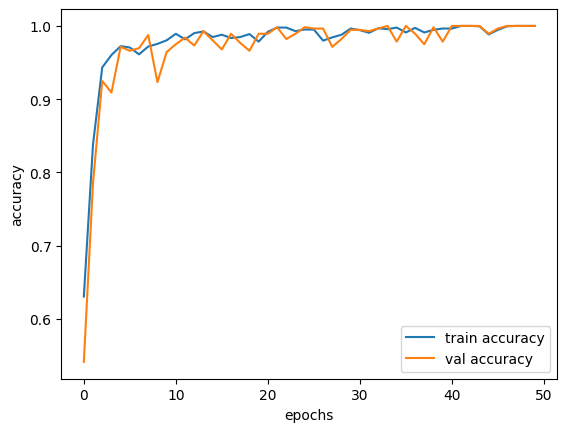

In [35]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

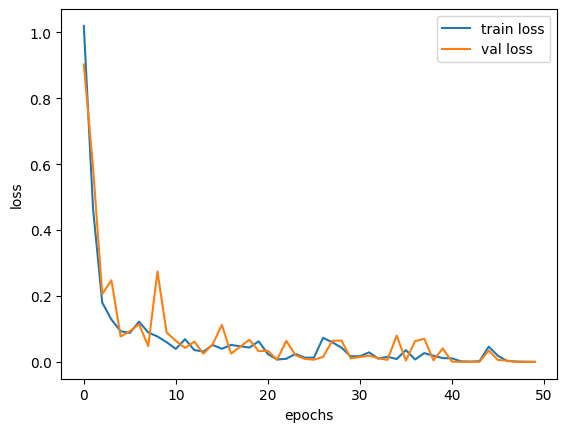

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
import pickle

# Simpan history
with open('Dataset/history.pickle', 'wb') as f:
    pickle.dump(history.history, f)